## 1. Data reads

In [1]:
%%time

import pandas as pd
import numpy as np

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# Read the CSV file
csv_file_path = 'data_public.csv'
data = pd.read_csv(csv_file_path)

# Print the basic information of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB
None
CPU times: user 2.8 s, sys: 1.06 s, total: 3.86 s
Wall time: 1.67 s


The number of rows and columns of the dataset: (1200000, 16)
data type:
A        float64
B        float64
C        float64
D        float64
E        float64
F        float64
G        float64
H        float64
I        float64
J        float64
K        float64
L        float64
M        float64
N        float64
O        float64
Class      int64
dtype: object

The number of missing values per column:
A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

Class distribution:
 Class
3    569521
2    449885
1    180594
Name: count, dtype: int64


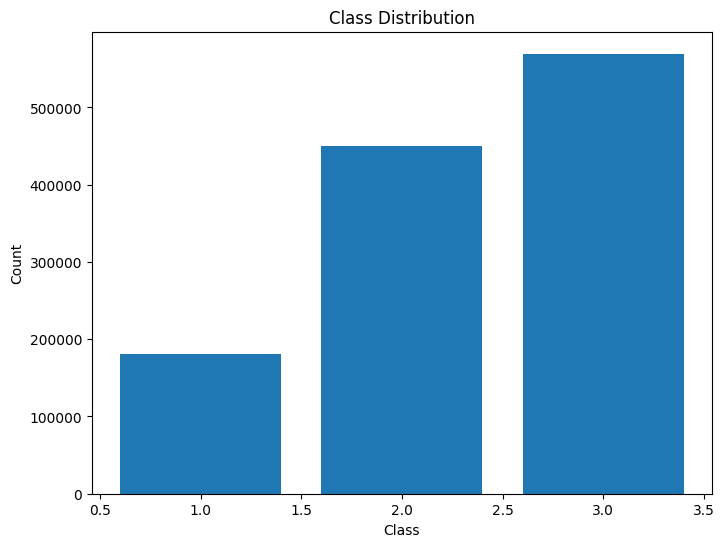

In [2]:
# Check the basic information of the data
print(f"The number of rows and columns of the dataset: {data.shape}")
print("data type:")
print(data.dtypes)

# Check for missing values
missing_values = data.isnull().sum()
print("\nThe number of missing values per column:")
print(missing_values)

import matplotlib.pyplot as plt

# View the distribution of target variables
class_counts = data['Class'].value_counts()
print("\nClass distribution:\n", class_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 2.  Divide the data set

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The column name of the target variable is 'Class'
target_column = 'Class'

# Separate features and target variables
X = data.drop(columns=target_column)
y = data[target_column]

# Standardized features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Because the dataset is relatively large, a part of the dataset is collected for analysis

# Merge X and Y
data_combined = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

# The current setup is about 12,000 for a smaller sample
data_sampled = data_combined.sample(frac=0.05, random_state=42)

# Separate the feature and target variables again
X_sampled = data_sampled.drop(columns=target_column)
y_sampled = data_sampled[target_column]

X_sampled_np = X_sampled.to_numpy()

# From a small sample data set, divide the training set and the test set
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

print(f'Sample data shape：\n{X_sampled.shape}')

Sample data shape：
(60000, 15)


## 3. Feature analysis

### 3.1 Pearson correlation coefficient characteristic analysis

Pearson correlation coefficient between features:
          A         B         C         D         E         F         G  \
A  1.000000  0.458931  0.992010  0.074359  0.990716  0.905623  0.972196   
B  0.458931  1.000000  0.544417  0.865135  0.356349  0.762189  0.622842   
C  0.992010  0.544417  1.000000  0.179099  0.971863  0.943652  0.988288   
D  0.074359  0.865135  0.179099  1.000000 -0.044322  0.479320  0.282037   
E  0.990716  0.356349  0.971863 -0.044322  1.000000  0.849506  0.939752   
F  0.905623  0.762189  0.943652  0.479320  0.849506  1.000000  0.969149   
G  0.972196  0.622842  0.988288  0.282037  0.939752  0.969149  1.000000   
H  0.988815  0.342817  0.968377 -0.059342  0.997105  0.841623  0.934743   
I  0.817600 -0.096208  0.752641 -0.501225  0.878499  0.507715  0.677094   
J  0.870540  0.804506  0.916146  0.546024  0.806460  0.989987  0.949606   
K  0.968752  0.249472  0.937830 -0.160835  0.989171  0.781819  0.893970   
L  0.141982  0.854587  0.241147  0.949805  0.02871

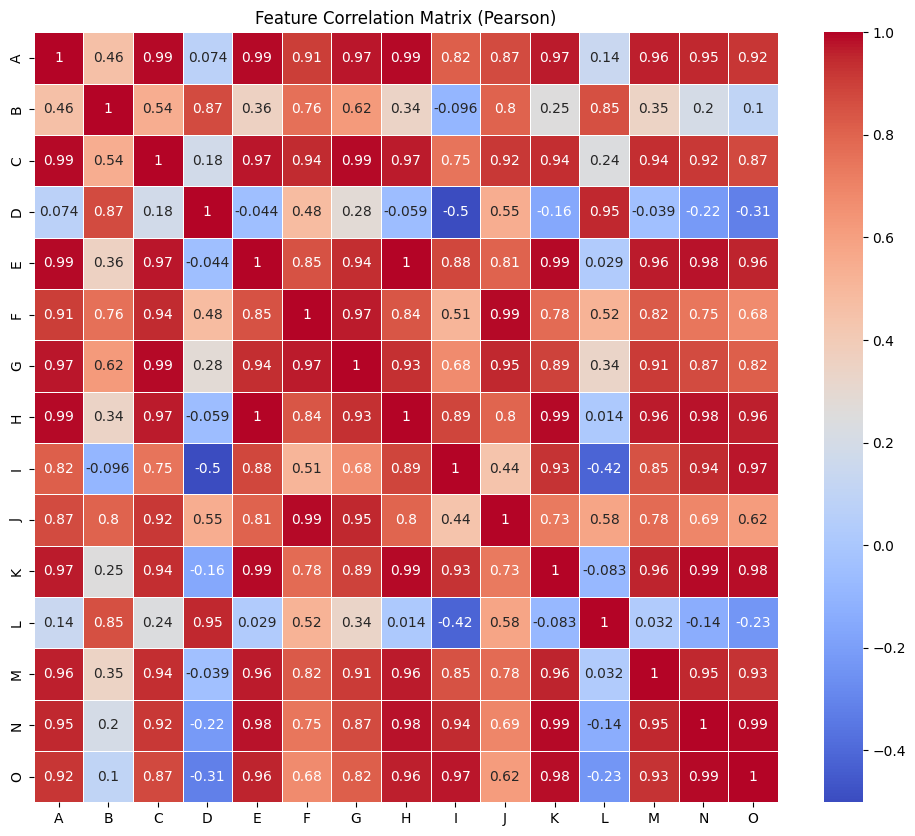

CPU times: user 567 ms, sys: 21.3 ms, total: 588 ms
Wall time: 273 ms


In [4]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns

# The Pearson correlation coefficient between features is calculated
correlation_matrix = X_sampled.corr()

# Print the correlation coefficient matrix
print("Pearson correlation coefficient between features:")
print(correlation_matrix)

# Visualize the correlation coefficient matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix (Pearson)')
plt.show()

### 3.2 PCA characterization analysis

Explain the variance ratio:
[7.34027211e-01 2.48872706e-01 5.92886857e-03 4.06479577e-03
 3.49016737e-03 6.53798551e-04 5.68234891e-04 4.67786188e-04
 4.61496565e-04 3.83717204e-04 3.15095127e-04 2.55861040e-04
 1.99907927e-04 1.85147938e-04 1.25205971e-04]

Cumulative explanatory variance ratio:
[0.73402721 0.98289992 0.98882879 0.99289358 0.99638375 0.99703755
 0.99760578 0.99807357 0.99853506 0.99891878 0.99923388 0.99948974
 0.99968965 0.99987479 1.        ]


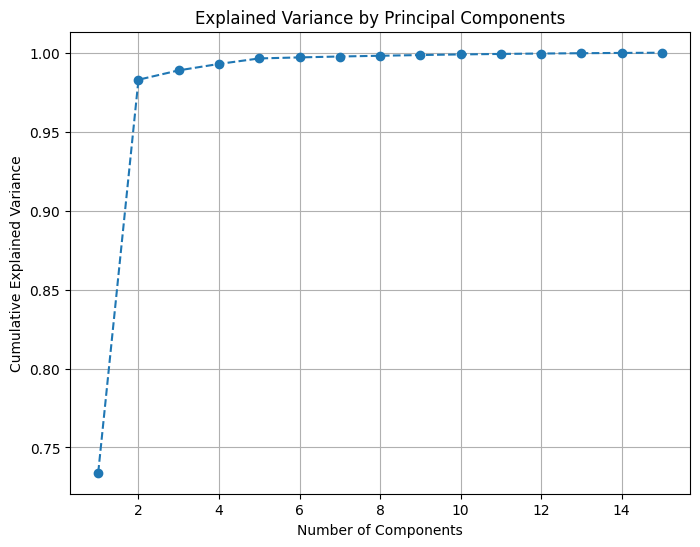

CPU times: user 329 ms, sys: 507 ms, total: 836 ms
Wall time: 125 ms


In [5]:
%%time 

from sklearn.decomposition import PCA

# PCA analysis
pca = PCA()
X_pca = pca.fit_transform(X_sampled)

# Explain the variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explanatory variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

# Print the explanatory variance ratio and the cumulative explanatory variance ratio
print("Explain the variance ratio:")
print(explained_variance_ratio)
print("\nCumulative explanatory variance ratio:")
print(cumulative_explained_variance_ratio)

# Visualize the cumulative explanatory variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

As can be seen from these values, the first two principal components explain the vast majority of the variance). The first two principal components cumulatively explained 98.29% of the variance. Dimensionality reduction through PCA can significantly reduce the number of features while retaining the main information in the data, which is helpful to improve the performance and training efficiency of subsequent models.

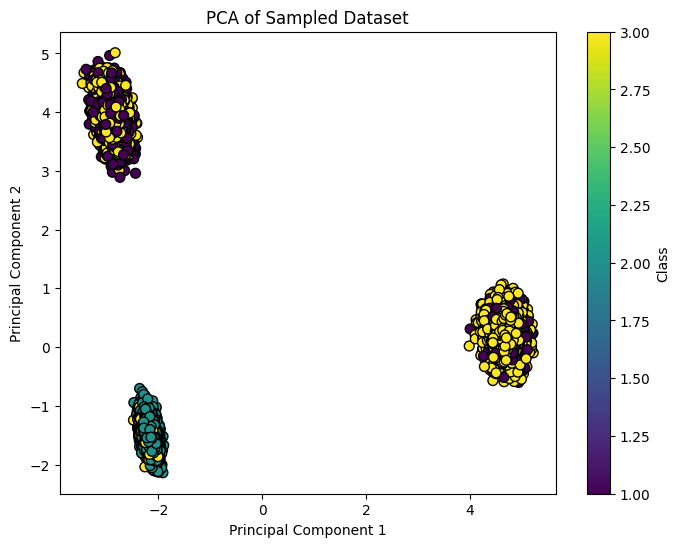

CPU times: user 1.42 s, sys: 2.17 s, total: 3.59 s
Wall time: 609 ms


In [6]:
%%time 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# # Feature engineering: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sampled, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sampled Dataset')
plt.colorbar(label='Class')
plt.show()

### 3.3 Feature selection based on feature importance using RandomForest

In [7]:
%%time

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Feature selection based on feature importance using RandomForest
feature_selector = RandomForestClassifier(n_estimators=100)
feature_selector.fit(X_train_sample, y_train_sample)

# Select features based on importance
selector = SelectFromModel(feature_selector, prefit=True, threshold="mean")
X_train_selected = selector.transform(X_train_sample)
X_test_selected = selector.transform(X_test_sample)

selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['D', 'H', 'I', 'K', 'N', 'O'], dtype='object')
CPU times: user 14 s, sys: 106 ms, total: 14.1 s
Wall time: 14.1 s


### 3.4 K-means cluster analysis was used

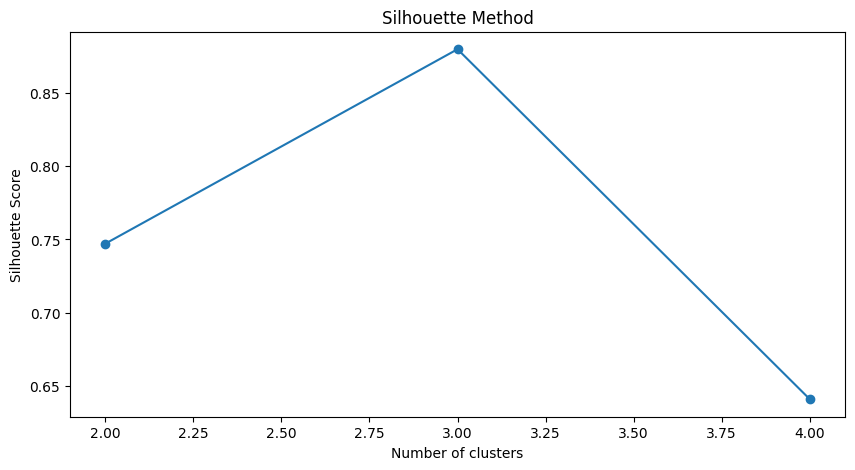

CPU times: user 2min 26s, sys: 3min 5s, total: 5min 31s
Wall time: 1min 9s


In [8]:
%%time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette Coefficient： evaluate the clustering effect
silhouette_scores = []
k_values = range(2, 5)  # Modify the k-value range to match the calculated profile factor
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_sampled.to_numpy())
    silhouette_scores.append(silhouette_score(X_sampled.to_numpy(), kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


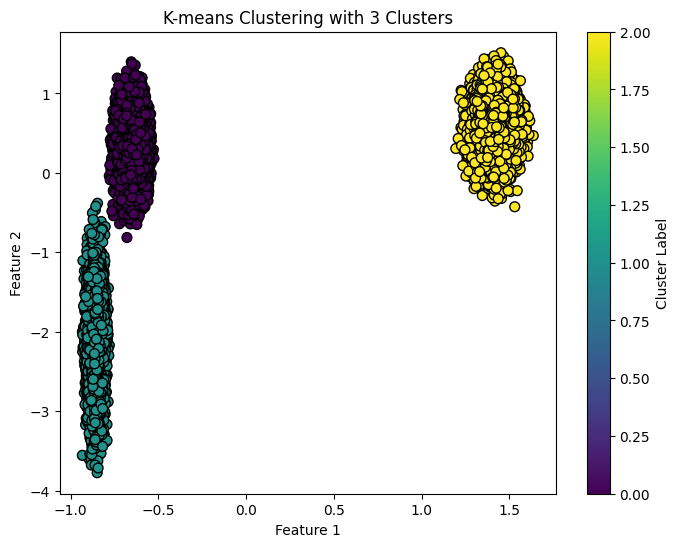

CPU times: user 3.38 s, sys: 6.31 s, total: 9.69 s
Wall time: 1.31 s


In [9]:
%%time

# Performing K-means clustering with the optimal number of clusters.
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_sampled_np)

# Get clustered labels
labels = kmeans.labels_

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_sampled_np[:, 0], X_sampled_np[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

### 3.5 Use DBSCAN clustering

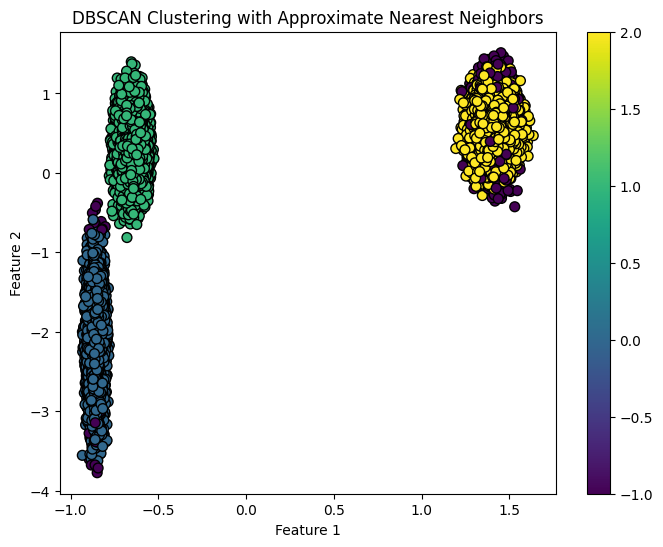

CPU times: user 1min 8s, sys: 2.61 s, total: 1min 11s
Wall time: 11.7 s


In [10]:
%%time

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Using Approximate Nearest Neighbor Search to Accelerate DBSCAN
nn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_sampled_np)
distances, indices = nn.kneighbors(X_sampled_np)
eps = np.percentile(distances[:, 4], 95)

dbscan = DBSCAN(eps=eps, min_samples=5, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(X_sampled_np)

# Visualize DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_sampled_np[:, 0], X_sampled_np[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Approximate Nearest Neighbors')
plt.colorbar()
plt.show()

## 4. Train the model

### 4.1 Define the preprocessing pipeline，Supervised learning using random forests

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Apply preprocessing to all feature columns
column_transformer = ColumnTransformer(transformers=[
    ('num', preprocessor, X.columns)
])

# Define the model pipeline and use GridSearchCV for parameter tuning
classifier = RandomForestClassifier()
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', classifier)
])

### 4.2 Train the model

In [12]:
%%time

# Train the model
pipeline.fit(X_train_sample, y_train_sample)

CPU times: user 7.59 s, sys: 1.79 s, total: 9.38 s
Wall time: 6.57 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### 4.3 Use GridSearchCV to tune parameters

In [13]:
%%time

from sklearn.model_selection import GridSearchCV

# Evaluate the model on the test set
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [4, 5, 6, 7, 8],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters found: {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 100}
Best cross-validation score: 0.7246904761904762
CPU times: user 3.3 s, sys: 1.75 s, total: 5.06 s
Wall time: 1min 12s


### 4.4 Evaluation models

In [14]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_sample)
print("Test set evaluation:")
print(classification_report(y_test_sample, y_pred))

Test set evaluation:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50      2723
           2       0.75      1.00      0.86      6725
           3       0.79      0.59      0.67      8552

    accuracy                           0.73     18000
   macro avg       0.68      0.70      0.68     18000
weighted avg       0.73      0.73      0.72     18000

CPU times: user 753 ms, sys: 67.5 ms, total: 821 ms
Wall time: 147 ms


## 5. Models are saved and converted to ONNX format

In [15]:
%%time 

import onnx
import onnxruntime as rt
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Save the best model in ONNX format
best_model = grid_search.best_estimator_
input_types = [(x, FloatTensorType([None, 1])) for x in X.columns]
onnx_model = convert_sklearn(best_model, initial_types=input_types)

onnx_model_path = "pipeline_model.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

CPU times: user 741 ms, sys: 183 ms, total: 924 ms
Wall time: 303 ms


## 6. Inference using the ONNX model

### 6.1 Inference perform

In [16]:
# Load the ONNX model and make predictions

import pandas as pd
import numpy as np
import onnx
import onnxruntime as rt
from sklearn.metrics import classification_report

# Read the CSV file
csv_file_path = 'data_public.csv'
data = pd.read_csv(csv_file_path)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The column name of the target variable is 'Class'
target_column = 'Class'

# Separate features and target variables
X = data.drop(columns=target_column)
y = data[target_column]

# Standardized features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Because the dataset is relatively large, a part of the dataset is collected for analysis

# Merge X and Y
data_combined = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

# The current setup is about 12,000 for a smaller sample
data_sampled = data_combined.sample(frac=0.01, random_state=42)

# Separate the feature and target variables again
X_sampled = data_sampled.drop(columns=target_column)
y_sampled = data_sampled[target_column]

X_sampled_np = X_sampled.to_numpy()

# From a small sample data set, divide the training set and the test set
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

onnx_model_path = "pipeline_model.onnx"
inputs_onnx = {k: np.array(v).astype(np.float32).reshape(-1, 1) for k, v in X_test_sample.to_dict(orient='list').items()}
session_onnx = rt.InferenceSession(onnx_model_path)
predict_onnx = session_onnx.run(None, inputs_onnx)
print("ONNX Model Prediction Result:", predict_onnx[0])

# The ONNX prediction results were compared to the actual test set labels
print("\nONNX Model Prediction Report:")
print(classification_report(y_test_sample, predict_onnx[0]))

ONNX Model Prediction Result: [1 2 2 ... 2 1 2]

ONNX Model Prediction Report:
              precision    recall  f1-score   support

           1       0.51      0.52      0.51       573
           2       0.74      1.00      0.85      1297
           3       0.78      0.57      0.66      1730

    accuracy                           0.71      3600
   macro avg       0.67      0.69      0.67      3600
weighted avg       0.72      0.71      0.70      3600



### 6.2 Save as a model in PMML format

In [17]:
%%time

from sklearn2pmml.decoration import ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml

from sklearn2pmml import sklearn2pmml
sklearn2pmml(pipeline, 'pipeline_model.pmml')

CPU times: user 921 ms, sys: 53.9 ms, total: 975 ms
Wall time: 46.8 s
